# Set up enviroment

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Start

In [3]:
from sklearn.linear_model import LinearRegression

def buildModel():
  model = LinearRegression()
  return model

## Reading dataset

In [4]:
# dataset_path = '/content/drive/MyDrive/UIT/IS403/Source_Code_PTDLKD/Data Train 1-3-2019 1-3-2024/Vietcombank.csv'
df = pd.read_csv('Vietcombank.csv', index_col="Date")


In [5]:
df.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2019-03-01 00:00:00+07:00,40478.95313,41275.25781,40346.23438,41275.25781,1225908
2019-03-04 00:00:00+07:00,41275.25781,41806.13281,41275.25781,41673.41406,2030592
2019-03-05 00:00:00+07:00,41673.41406,42337.00391,41474.33594,41806.13281,2376092
2019-03-06 00:00:00+07:00,41872.48828,42005.20703,41076.18359,41607.05469,2107101
2019-03-07 00:00:00+07:00,41607.05469,42337.00391,41540.69531,41872.48828,3091640
2019-03-08 00:00:00+07:00,41407.97656,41806.13281,41208.90234,41673.41406,1502992
2019-03-11 00:00:00+07:00,41407.97656,41607.05469,41076.18359,41540.69531,2149189
2019-03-12 00:00:00+07:00,41806.13281,43000.59375,41607.05469,43000.59375,3397250
2019-03-13 00:00:00+07:00,43133.30859,43266.02734,42801.51563,43266.02734,2682908


In [6]:
print(f"Data shape: {df.shape}")

Data shape: (1306, 5)


## Data preprocessing

### Checking duplicates and null values

In [7]:
print("Duplicated")
df.duplicated().sum()

Duplicated


0

In [8]:
print("Null")
df.isnull().sum()

Null


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

### Checking DataFrame information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 2019-03-01 00:00:00+07:00 to 2024-05-31 00:00:00+07:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1306 non-null   float64
 1   High    1306 non-null   float64
 2   Low     1306 non-null   float64
 3   Close   1306 non-null   float64
 4   Volume  1306 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 61.2+ KB


### Overview Data Descriptive statistic

In [10]:
df.describe()

,Open,High,Low,Close,Volume
count,1306.000000,1306.000000,1306.000000,1306.000000,1.306000e+03
mean,66632.287625,67376.869907,65893.990794,66674.472992,1.749315e+06
std,13650.638359,13709.120368,13537.991191,13618.837973,1.424309e+06
min,37957.312500,38753.621090,37559.160160,37957.312500,3.044610e+05
25%,56736.890630,57151.636722,56206.019530,56604.175780,1.055342e+06
50%,65214.910160,65927.601565,64434.527340,65164.476560,1.462575e+06
75%,75359.867190,76286.236327,74640.132812,75508.042970,2.096924e+06
max,98500.000000,100500.000000,97300.000000,97400.000000,3.407681e+07


## Linear Regression Model

### Split Data

In [11]:
df.reset_index(inplace=True)

features = df.index
target = df['Close']

def splitTrainTest(test_ratio):
    n_observations = len(df)

    train_size = int((1-test_ratio) * n_observations)
    test_size = n_observations - train_size

    x_train, x_test = (
        np.array(features[:train_size]).reshape(-1, 1),
        np.array(features[train_size:train_size + test_size]).reshape(-1, 1)
    )
    y_train, y_test = target[:train_size], target[train_size:train_size + test_size]

    return x_train, x_test, y_train, y_test

In [12]:
def makePlots(data):
    (test_ratio, x_train, y_train, x_test, y_test, y_pred, x_next_30_days, y_next_30_days) = data

    figname = f'VCB__{int(10-test_ratio*10)}-{int(test_ratio*10)}'
    plt.title(figname)
    plt.xlabel('Index')
    plt.ylabel('Price')

    # train
    plt.plot(x_train, y_train)

    # test
    plt.plot(x_test, y_test)
    plt.plot(x_test, y_pred)

    # next 30 days
    plt.plot(x_next_30_days, y_next_30_days)

    # save plots and show
    plt.legend(['Train', 'Test', 'Predictions (Test)','Predictions (Next30Days)'])
    # plt.savefig("plots/%s.png" % figname,bbox_inches='tight')
    plt.show()

In [13]:
def evaluateAccuracy(y_test, y_pred):
    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print('Testing RMSE:', test_rmse)

    test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
    print('Testing MAPE:', test_mape)

    test_mae = np.mean(abs(y_pred - y_test))
    print('Testing MAE:', test_mae)

In [14]:
# train:test 9:1 8:2 7:3
test_ratio = 0.2

print("==============================")
print('Test Ratio: ', test_ratio)

#====Start-Linear-Regression-model====#
# split train test by test_ratio
x_train, x_test, y_train, y_test= splitTrainTest(test_ratio)

print("Train: ", x_train.shape)
print("Test: ", x_test.shape)

# create linear regression model
model = buildModel()
model.fit(x_train, y_train)

# make prediction
y_pred = model.predict(x_test)

# compare actual and predicted price
comparison_data = {'Actual_Price':y_test, 'Predicted_Price':y_pred}
comparison_table = pd.DataFrame(comparison_data)
print(comparison_table)

# evaluate accuracy
evaluateAccuracy(y_test, y_pred)
#====End-Linear-Regression-model====#



#====Start-Predick-next-30-days====#
print("==============================")
last_index =  df.index[-1]
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
print("Next 30 Days:")
print(y_next_30_days)
#====End-Predick-next-30-days====#

Test Ratio:  0.2
Train:  (1044, 1)
Test:  (262, 1)
      Actual_Price  Predicted_Price
1044   76037.25781     74370.610029
1045   78746.82813     74395.588131
1046   78154.10938     74420.566233
1047   77900.08594     74445.544336
1048   77053.34375     74470.522438
...            ...              ...
1301   90200.00000     80789.982357
1302   90700.00000     80814.960460
1303   89800.00000     80839.938562
1304   88600.00000     80864.916664
1305   87200.00000     80889.894767

[262 rows x 2 columns]
Testing RMSE: 10964.974601518923
Testing MAPE: 0.11635707410406552
Testing MAE: 10382.152033547132
Next 30 Days:
[80914.87286939 80939.85097183 80964.82907428 80989.80717672
 81014.78527917 81039.76338161 81064.74148406 81089.71958651
 81114.69768895 81139.6757914  81164.65389384 81189.63199629
 81214.61009874 81239.58820118 81264.56630363 81289.54440607
 81314.52250852 81339.50061097 81364.47871341 81389.45681586
 81414.4349183  81439.41302075 81464.39112319 81489.36922564
 81514.3473280

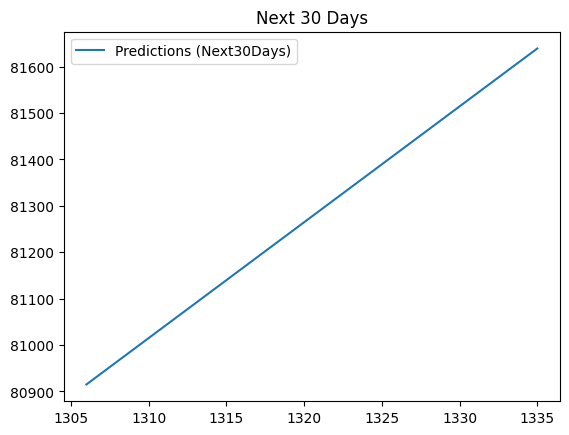

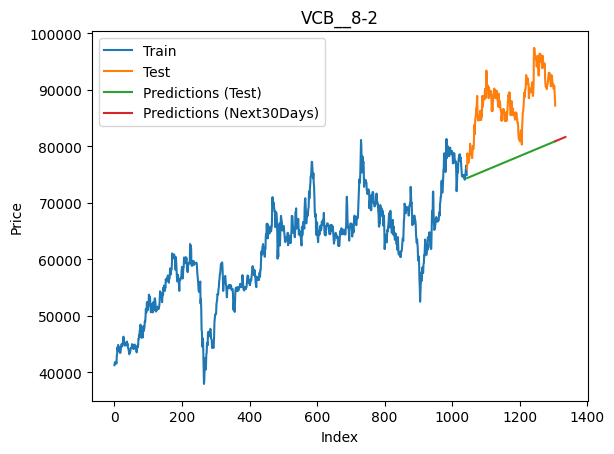

In [15]:
# use plots to display data
# next 30 days
plt.title("Next 30 Days")
plt.plot(x_next_30_days, y_next_30_days)
plt.legend(['Predictions (Next30Days)'])
plt.show()
# all
makePlots((test_ratio, x_train , y_train, x_test, y_test, y_pred, x_next_30_days, y_next_30_days))